In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
import sklearn.model_selection
import matplotlib.pyplot as plt
import sys
from math import sqrt

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [4]:
#ocr_merged=np.load('ocr_merged.npy')
#tm_merged=np.load('tm_merged.npy')
#p2v_merged=np.load('p2v_merged.npy')
#p2v3_merged=np.load('p2v3_merged.npy')
#ocr_tm_merged=np.load('ocr_tm_merged.npy')
#ocr_p2v3_merged=np.load('ocr_p2v3_merged.npy')
#ocr_tm_p2v_merged=np.load('ocr_tm_p2v_merged.npy')

In [54]:
df=pd.read_pickle('df_p2v2.pkl')
dataset = df.to_numpy()

In [55]:
x = dataset[:,8:16]
y = dataset[:,18]

In [56]:
col_mask=df.isnull().any(axis=0)
row_mask=df.isnull().any(axis=1)
df.loc[row_mask,col_mask]

,Images
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
495,NaN
496,NaN
497,NaN
498,NaN


In [5]:
#a=np.ones((501,1))
#b=np.zeros((501,1))
#dh_score=np.vstack((a, b))
#len(dh_score)

1002

## Keras MLP

In [109]:
x=tm_merged
y=dh_score

In [22]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.7,stratify=y_test)
model = Sequential()
#input_size = len(x[0])
input_size =1536
model.add(Dense(100, activation="relu", input_dim=input_size))
model.add(Dense(100, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="mse",metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, verbose=1)
y_pred = model.predict(x_test)

ValueError: Error when checking input: expected dense_1_input to have shape (1536,) but got array with shape (8,)

In [77]:
#def model():
    #model = Sequential()
    #input_size = len(x[0])
    #model.add(Dense(100, activation="relu", input_dim=input_size))
    #model.add(Dense(100, activation="relu"))
    #model.add(Dense(1, activation="sigmoid"))
    #model.compile(optimizer="adam", loss="mse",metrics=['accuracy'])
    #return model

In [111]:
history = model.fit(x_train, y_train,
                    batch_size=25,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))

Train on 701 samples, validate on 5 samples
Epoch 1/100
701/701 [==============================] - 0s 48us/step - loss: 7.2753e-04 - accuracy: 0.9986 - val_loss: 8.4731e-05 - val_accuracy: 1.0000
Epoch 2/100
701/701 [==============================] - 0s 36us/step - loss: 7.2470e-04 - accuracy: 0.9986 - val_loss: 8.4133e-05 - val_accuracy: 1.0000
Epoch 3/100
701/701 [==============================] - 0s 36us/step - loss: 7.2320e-04 - accuracy: 0.9986 - val_loss: 8.4430e-05 - val_accuracy: 1.0000
Epoch 4/100
701/701 [==============================] - 0s 36us/step - loss: 7.2284e-04 - accuracy: 0.9986 - val_loss: 8.5587e-05 - val_accuracy: 1.0000
Epoch 5/100
701/701 [==============================] - 0s 36us/step - loss: 7.2244e-04 - accuracy: 0.9971 - val_loss: 8.5841e-05 - val_accuracy: 1.0000
Epoch 6/100
701/701 [==============================] - 0s 34us/step - loss: 7.1824e-04 - accuracy: 0.9986 - val_loss: 8.3097e-05 - val_accuracy: 1.0000
Epoch 7/100
701/701 [=======================

Epoch 55/100
701/701 [==============================] - 0s 36us/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 6.1425e-05 - val_accuracy: 1.0000
Epoch 56/100
701/701 [==============================] - 0s 35us/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 6.1529e-05 - val_accuracy: 1.0000
Epoch 57/100
701/701 [==============================] - 0s 36us/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 6.0946e-05 - val_accuracy: 1.0000
Epoch 58/100
701/701 [==============================] - 0s 35us/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 6.0819e-05 - val_accuracy: 1.0000
Epoch 59/100
701/701 [==============================] - 0s 35us/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 6.2116e-05 - val_accuracy: 1.0000
Epoch 60/100
701/701 [==============================] - 0s 35us/step - loss: 0.0014 - accuracy: 0.9986 - val_loss: 6.1232e-05 - val_accuracy: 1.0000
Epoch 61/100
701/701 [==============================] - 0s 35us/step - loss: 0.0014 - accuracy: 0.9986 - v

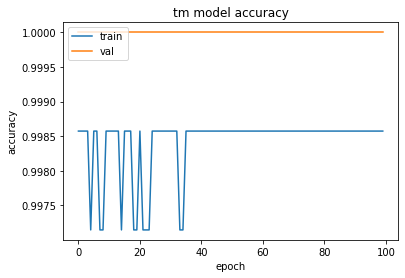

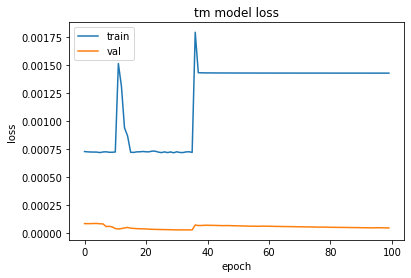

In [113]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('tm model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('tm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## MLP Regressor in Scikit Learn

In [57]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(100,100), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.01,
                 power_t=0.5, max_iter=1000,tol=1e-4,random_state=2020)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=2020)
mlp.fit(x_train, y_train)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

ValueError: setting an array element with a sequence.

In [53]:
pipeline=Pipeline([('transformer',scaler),('estimator',mlp)])
pipeline.fit(x,y)
cv=KFold(n_splits=15,random_state=2020)
scorescrossval=cross_val_score(pipeline,x_test,y_test,cv=cv)

/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jl8394/humor/lib/python3.6/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A colum

In [54]:
nnr_pred = mlp.predict(x_test)
nny_pred= mlp.predict(x_train)
list_training_error = []
list_testing_error = []

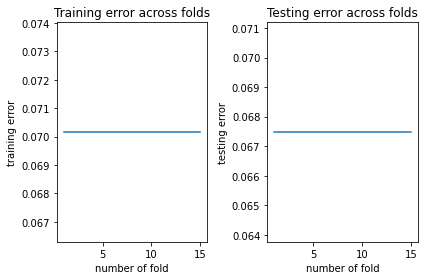

In [55]:
for train_index, test_index in cv.split(x):
    fold_training_error = mean_absolute_error(y_train, nny_pred)        
    fold_testing_error = mean_absolute_error(y_test, nnr_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

    
plt.subplot(1,2,1)
plt.plot(range(1, cv.get_n_splits() + 1), np.array(list_training_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(range(1, cv.get_n_splits() + 1), np.array(list_testing_error).ravel())
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()

In [56]:
neural_network_regression_score = mlp.score(x_test, y_test)
neural_network_regression_score

0.9639835960110431

## MLP Classifier

In [6]:
x=ocr_tm_p2v_merged
y=dh_score

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500,activation = 'relu',solver='adam',random_state=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=2020)
mlp.fit(x_train, y_train)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
    


In [11]:
mlp.fit(x_train, y_train)

/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
#Predicting y for X_val
#y_pred = mlp.predict(x_train)
predictions = mlp.predict(x_test)

In [19]:
#Importing Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
#Comparing the predictions against the actual observations in y_val
#cm = confusion_matrix(y_pred, y_train)
print(confusion_matrix(y_test,predictions))

[[104  38]
 [ 48 111]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       142
         1.0       0.74      0.70      0.72       159

    accuracy                           0.71       301
   macro avg       0.71      0.72      0.71       301
weighted avg       0.72      0.71      0.71       301

